# Benchmarking Different Methods 2

In this task we will benchmark a number of different methods evaluating both performance and quality 
of solutions. 

Here we continue exploration of methods.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import pandas as pd
import time
import matplotlib

import imageio
import matplotlib.image as mpimage

import flatnetwork as fnmod

from abstract_udmis import AbstractUDMIS
%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

font = {'family' : 'Dejavu Sans',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

u = 1.35

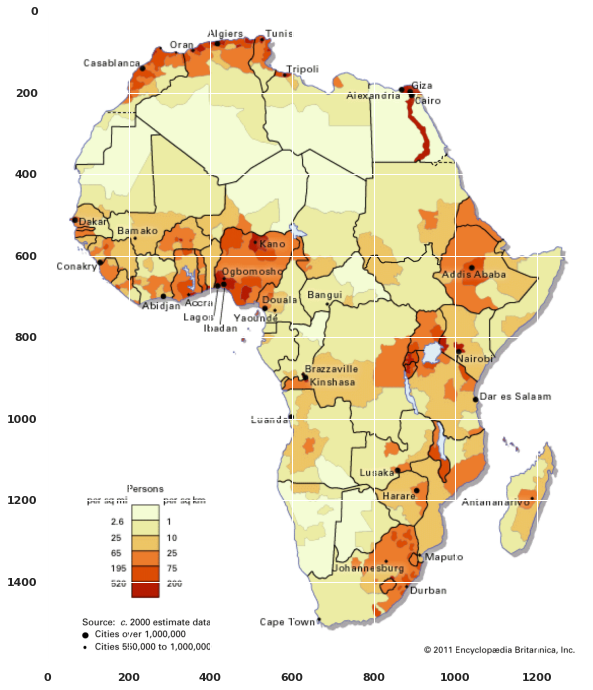

In [134]:
imp = mpimage.imread('./results/opTasks/africaPD.gif')
plt.imshow(im)

In [197]:
msb = [256**3, 256**2, 256, 1] 
sfn = lambda x: x[0]*msb[0] + x[1]*msb[1] + x[2]*msb[2] + x[3]

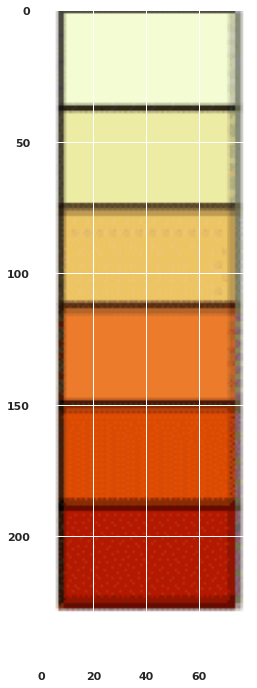

In [198]:
subimg = imp[1212:1460,200:280,:]
plt.imshow(subimg)
imc = []
for i in range(subimg.shape[0]):
    for j in range(subimg.shape[1]):
        imc.append(sfn(subimg[i,j]))

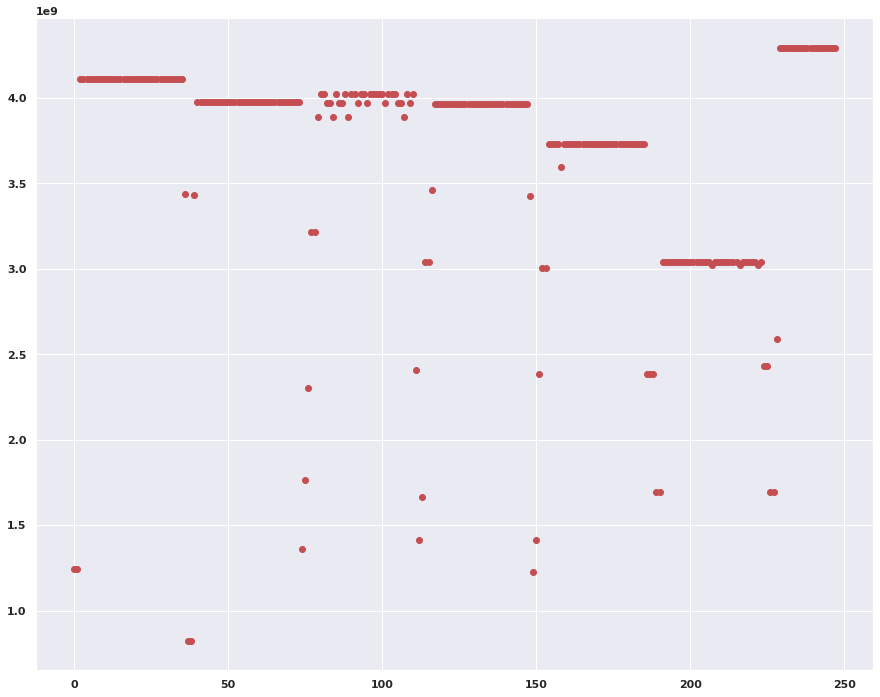

In [279]:
#Identify the requisite color codesb
y = np.asarray(imc).reshape(subimg.shape[0],subimg.shape[1])[:,50]
plt.plot(range(0,subimg.shape[0]),y,'or')

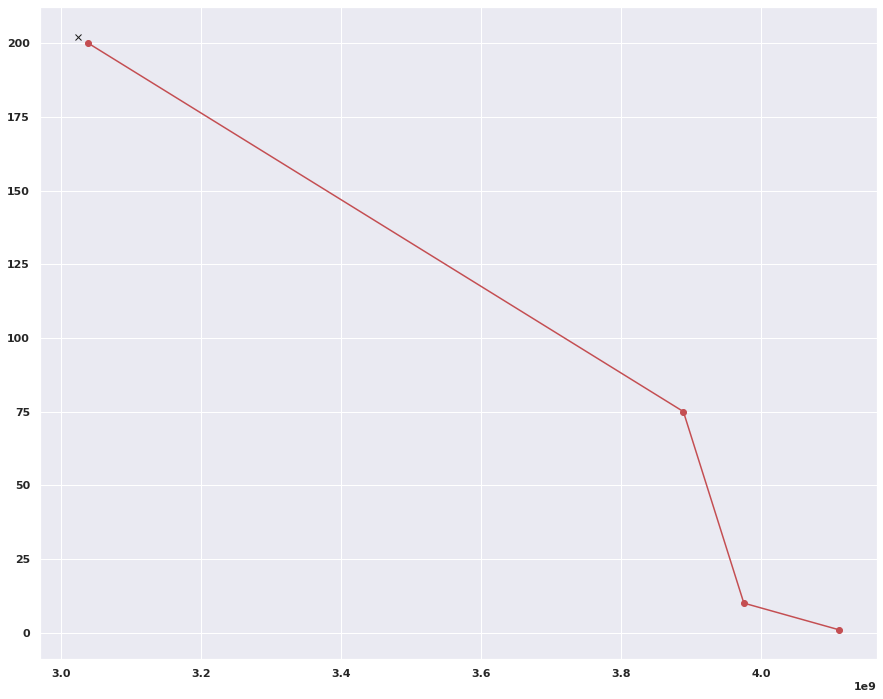

In [280]:
#Color codes and associated populations
lb = 0.995
ub = 1.005
ccodes = {(y[25]*lb,y[25]*ub): 1.0, (y[55]*lb,y[55]*ub): 10.0, (y[130]*lb,y[130]*ub): 75, (y[210]*lb,y[210]*ub): 200}
#plt.plot(y[90:110],'ob')
ccodes[(min(y[90:110]),max(y[90:110]))] = 25 

ccodes = {y[25]:1.0, y[55]:10.0, min(y[90:110]): 75, y[210]:200.}
cckeys = np.array([k for k in ccodes.keys()])
ccvals = [v for v in ccodes.values()]
slopes = list()
consts = list()
for i in range(3):
    slopes.append((ccvals[i+1]-ccvals[i])/(cckeys[i+1]-cckeys[i]))
    consts.append(ccvals[i] - slopes[i]*cckeys[i])
#print(slopes)
#print(consts)   
#print(cckeys)

v = cckeys[3]*0.995
#print(v)
#print(v > cckeys)
#print(np.where((v > cckeys) == True)[0])
wtfn = lambda x: (slopes[2]*x + consts[2] if np.where(x>cckeys)[0].size == 0 else slopes[np.where((x>cckeys) == True)[0][0]-1]*x + consts[np.where((x>cckeys) == True)[0][0]-1])
#print(wtfn(v))

plt.plot(ccodes.keys(),ccodes.values(),'-or', v,wtfn(v),'xk')

'\nimf = []\nfor i in range(impc.shape[0]):\n    for j in range(impc.shape[1]):\n        imf.append(sfn(impc[i,j]))\nimf = np.array(imf)\n'

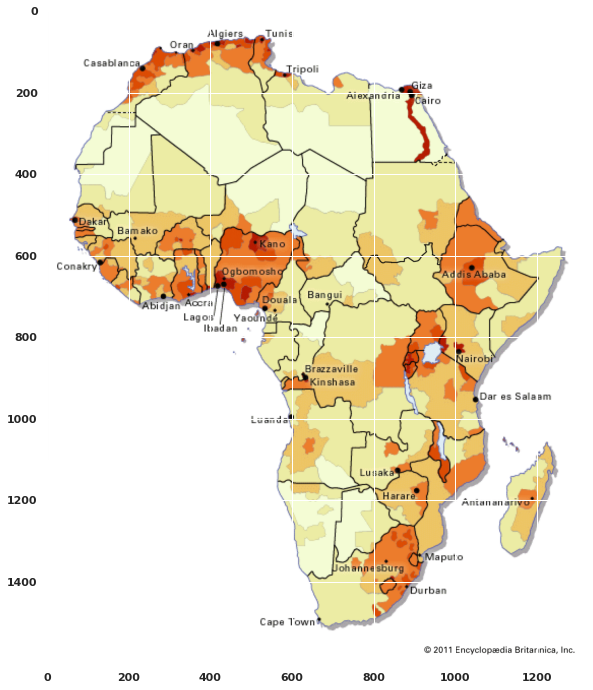

In [143]:
#Clean up
#plt.imshow(imp[1100:imp.shape[0],0:500,:])
impc = np.copy(imp)
for x in range(1100,imp.shape[0]):
    for y in range(0,500):
        impc[x,y] = [255, 255, 255, 255]       
plt.imshow(impc)

'''
imf = []
for i in range(impc.shape[0]):
    for j in range(impc.shape[1]):
        imf.append(sfn(impc[i,j]))
imf = np.array(imf)
'''

In [285]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [283]:
rcell = sfn([255,255,255,255])
d = 20
cells = {}
mcells = {}
pcells = {}
rcells = {}

#Better edge detection when alpha is removed
sfna = lambda x: x[0]*msb[0] + x[1]*msb[1] + x[2]*msb[2] 

#Need a way to interpolate weights
wtfn = lambda x: (slopes[2]*x + consts[2] if np.where(x>cckeys)[0].size == 0 else slopes[np.where((x>cckeys) == True)[0][0]-1]*x + consts[np.where((x>cckeys) == True)[0][0]-1])

#DO NOT FORGET 
#Dimension 0 is Rows = y and 1 is Cols = x!
totalWt = 0.0
for x in range(0,impc.shape[0],d):
    for y in range(0,impc.shape[1],d):
        #Get average color of patch
        c = [int(np.floor(np.average(impc[x:x+d,y:y+d,di].ravel()))) for di in range(0,4)]
        cm = [int(np.floor(np.median(impc[x:x+d,y:y+d,di].ravel()))) for di in range(0,4)]        
        
        if(sfna(c) < sfna([255,255,255,255])):
            cells[(y,x)] = c
            mcells[(y,x)] = cm
                        
            cwt = wtfn(sfn(cm)*1.0)
            
            pcells[(y,x)] = cwt
            totalWt += cwt
        else:
            #print(x,y,c)
            rcells[(y,x)] = c

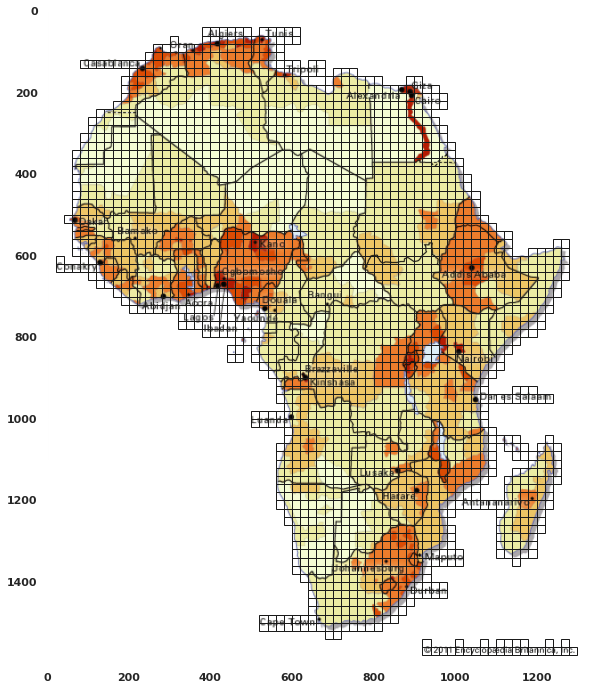

In [207]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(impc)

for cell in cells:
    rect = Rectangle(cell,d,d,ec='k',fc='none',alpha=1.0)
    ax.add_patch(rect)
   
#for cell in rcells:
#    rect = Rectangle(cell,d,d,ec='r',fc='none',alpha=1.0)
#    ax.add_patch(rect)

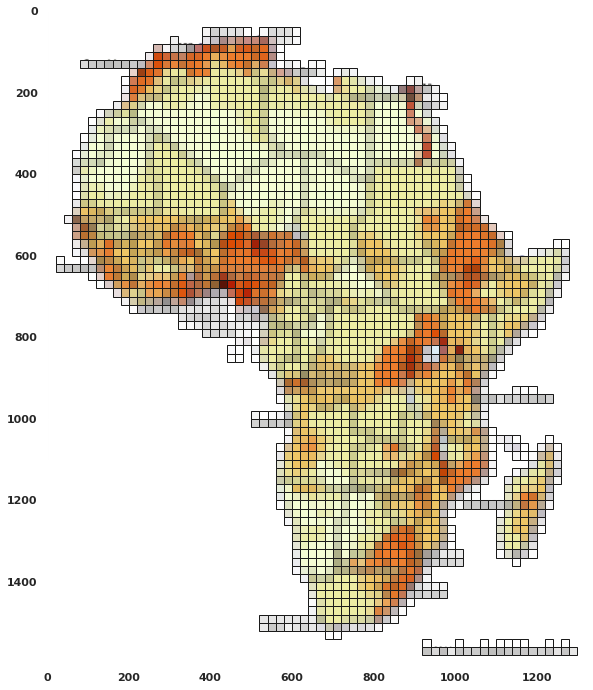

In [208]:
#Make averaged out plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(impc)

hc = lambda x: '#' + hex(x[0])[2:].zfill(2) + hex(x[1])[2:].zfill(2) + hex(x[2])[2:].zfill(2)

for cell in cells:    
    #print(cells[cell],hc(cells[cell]))
    rect = Rectangle(cell,d,d,ec='k',fc=hc(cells[cell]))
    ax.add_artist(rect)

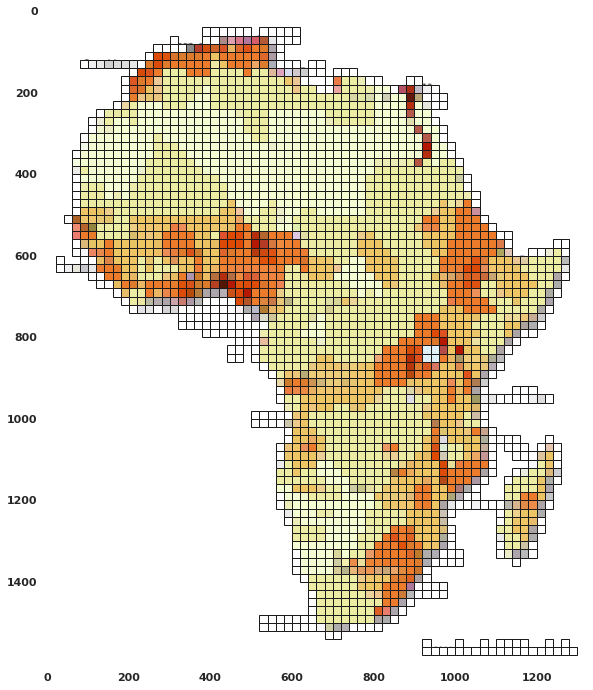

In [269]:
#Make median out plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(impc)

hc = lambda x: '#' + hex(x[0])[2:].zfill(2) + hex(x[1])[2:].zfill(2) + hex(x[2])[2:].zfill(2)

for cell in mcells:    
    #print(cells[cell],hc(cells[cell]))
    rect = Rectangle(cell,d,d,ec='k',fc=hc(mcells[cell]))
    ax.add_artist(rect)

72574.55125178842


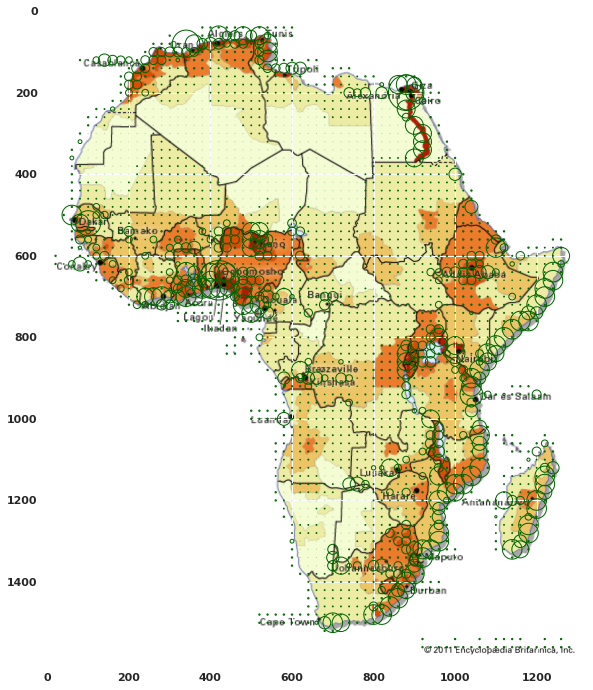

In [291]:
#Make probability plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(impc)

hc = lambda x: '#' + hex(x[0])[2:].zfill(2) + hex(x[1])[2:].zfill(2) + hex(x[2])[2:].zfill(2)

N = 1600
for cell in pcells:    
    #print(cells[cell],hc(cells[cell]))
    #print(cell, pcells[cell]/totalWt*N)
    ax.add_artist(Circle(xy=cell, radius=pcells[cell]/totalWt*N*5.0, 
        facecolor='none', alpha=1.0, edgecolor='darkgreen'))
    

In [351]:
#We are resource limited so we have to coarse-grain to reasonable number of cells for now
cgd = d*4
pgcells = {}
gcells = list()

for x in range(0,impc.shape[0],cgd):
    for y in range(0,impc.shape[1],cgd):
        
        gcells.append((y,x))
        
        #Do a weighted vertex location
        ax = 0.0
        ay = 0.0
        ltw = 0.0
        found = False
        for vx in range(x,x+cgd,d):
            for vy in range(y,y+cgd,d):                
                if (vy,vx) in pcells:
                    ax = vx*pcells[(vy,vx)] + ax
                    ay = vy*pcells[(vy,vx)] + ay
                    ltw += pcells[(vy,vx)]
                    found = True
                    #pgcells[(x,y)] = pcells[(vx,vy)]/totalWt if not (x,y) in pgcells else pgcells[(x,y)] + pcells[(vx,vy)]/totalWt
        if(found):
            ax /= ltw
            ay /= ltw
            ltw /= totalWt
            if(ax < 1500):
                pgcells[(ay,ax)] = ltw

In [352]:
print('Number of cells before coarse graining: ',len(pcells))
print('After coarse graining number of locations: ',len(pgcells))

Number of cells before coarse graining:  2656
After coarse graining number of locations:  199


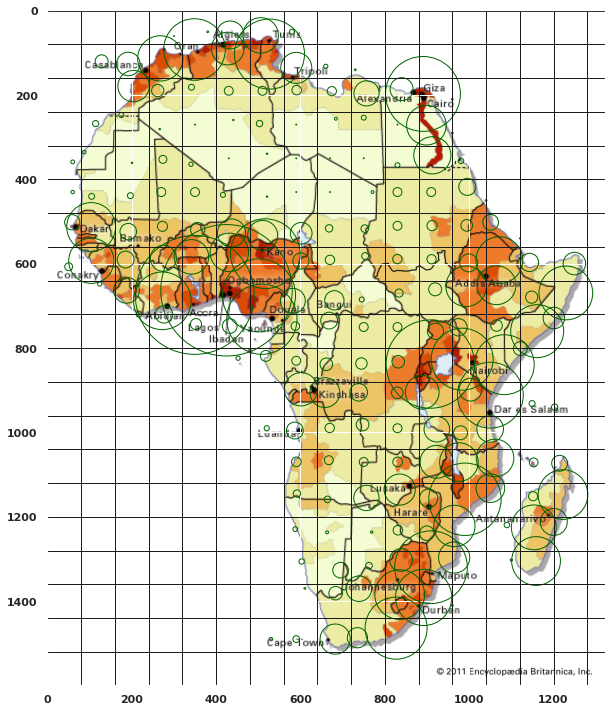

In [353]:
#Make coarse-grained probability plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.imshow(impc)

hc = lambda x: '#' + hex(x[0])[2:].zfill(2) + hex(x[1])[2:].zfill(2) + hex(x[2])[2:].zfill(2)

N = 1600
for cell in pgcells:    
    #print(cells[cell],hc(cells[cell]))
    #print(cell, pcells[cell]/totalWt*N)
    ax.add_artist(Circle(xy=cell, radius=pgcells[cell]*N*3.0, 
        facecolor='none', alpha=1.0, edgecolor='darkgreen'))

for cell in gcells:    
    rect = Rectangle(cell,cgd,cgd,ec='k',fc='none')
    ax.add_artist(rect)    

In [407]:
# Business strategy is to maximize on large population centers
edges = []
vtxs = [x for x in pgcells.keys()]
pvalues = [x for x in pgcells.values()]

locs = np.argsort(np.array(pvalues))
bestps = np.sort(np.array(pvalues))[::-1]
bestps = bestps[0:int(0.2*len(bestps))]

d2coll = []
deltapcoll = []
for i in range(len(vtxs)):
    for j in range(i+1,len(vtxs)):
            d2 = (vtxs[i][0]-vtxs[j][0])**2 + (vtxs[i][1]-vtxs[j][1])**2
            deltap = abs(pgcells[vtxs[i]] - pgcells[vtxs[j]])/min(pgcells[vtxs[i]],pgcells[vtxs[j]])
            
            d2coll.append(d2)
            deltapcoll.append(deltap)
            if(d2<(cgd*5)**2 and deltap<0.05 and ((not pgcells[vtxs[i]] in bestps) and (not pgcells[vtxs[j]] in bestps))):
                edges.append((i,j))
              
print(len(edges))
print(max(d2coll), (d*cgd)**2)
print(max(deltapcoll),min(deltapcoll))

204
2464661.4848808004 2560000
153.4436285311111 0.0


In [408]:
import functools
import networkx as nx 
import seaborn as sns

def showGraph(vtxs, edges, vtxCs, solList):
    sns.set(rc={'figure.figsize':(10,15)})
    G = nx.Graph() 
    G.add_nodes_from(vtxs)
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    color_map = list()

    for node in solList:
        if node == '0':
            color_map.append('lightblue')
        else: 
            color_map.append('orange')

    node_labels = {} 
    for node in G.nodes():
        node_labels[node] = str(int(node))

    pos = {v:vtxCs[v] for v in vtxs}
    
    flipped_pos = {node: (x,-y) for (node, (x,y)) in pos.items()}
    fig, ax = plt.subplots(1, 1)       
    
    nx.draw_networkx(G, pos=flipped_pos, with_labels=False, node_color=color_map)
    nx.draw_networkx_labels(G, flipped_pos, node_labels)
    for node in G.nodes():
        ax.add_artist(Circle(xy=flipped_pos[node], radius=.5, 
        facecolor='lightblue', alpha=0.2, edgecolor='black'))
    plt.grid('on')
    plt.show()

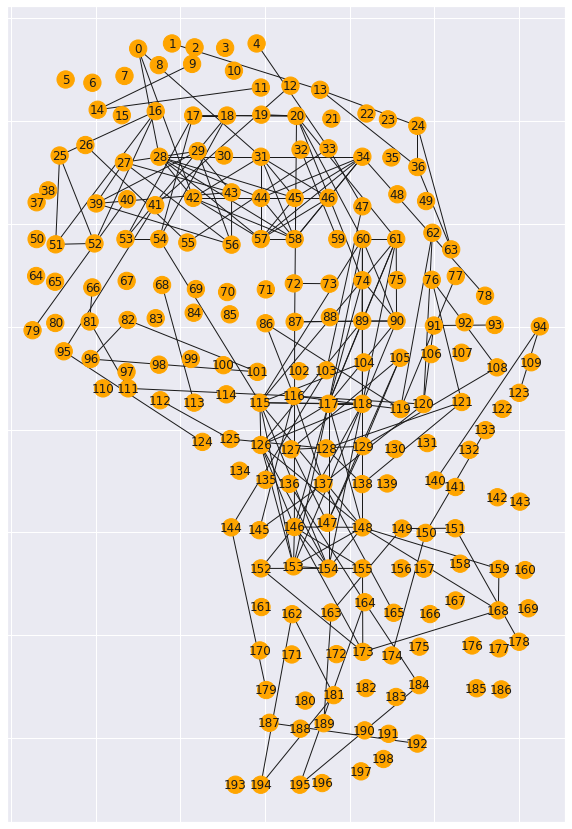

In [409]:
L = len(vtxs)
showGraph([x for x in range(L)],edges,vtxs,[0]*L)

In [410]:
class UDMIS2(AbstractUDMIS):
    def __init__(self, u, L, edges):
        super().__init__()
        self.u, self.edges = u, edges
        self.num_vertices = L
                
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
       
        #connections list
        self.clist = self.makeConnList()
        #print(self.clist)
        
    def makeConnList(self):
        
        clist = {}
        for i in range(self.num_vertices):
            clist[i] = []
            
        for pair in self.edges:
            clist[pair[0]] += [pair[1]]
            clist[pair[1]] += [pair[0]]
            
        return clist
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        
        for pair in self.edges:
            interaction_term += self.occupations[pair[0]]*self.occupations[pair[1]]
            
        for i in range(self.num_vertices):
            vertex_term += self.occupations[i]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
                
        connections = self.clist[i]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices) 

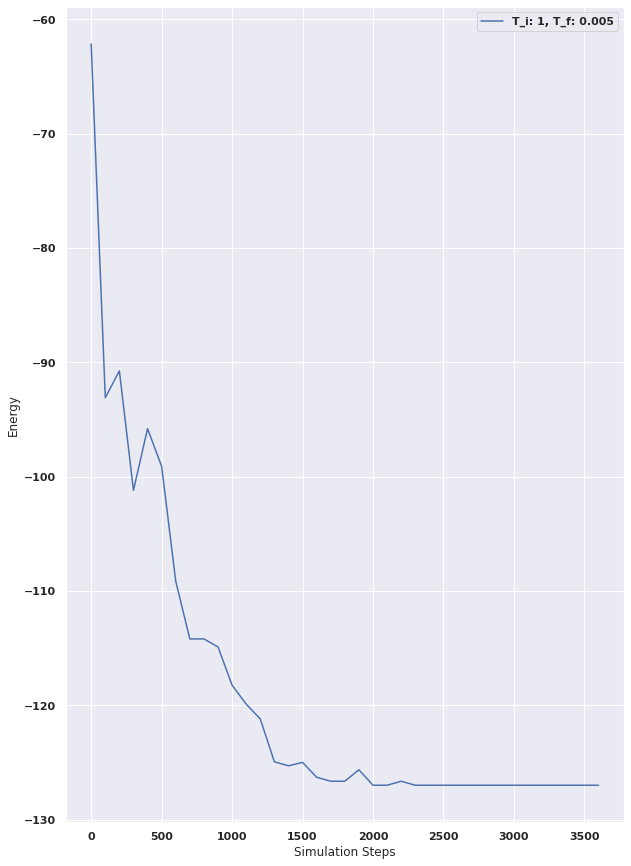

In [411]:
udmis = UDMIS2(u, L, edges)

#Start with Simulated Annealing
N = 5000
# T_i_list = [100, 10, 1000, 500, 50, 5, 1]
# T_i_list = [100, 1]
# T_i_list = [1]
# T_f_list = [0.01, 0.001, 0.1, 0.5, 1]
# T_f_list = [0.01, 0.005]

# params_list = list(itertools.product(T_i_list, T_f_list))

# params_list = [[100, 0.01]]
# params_list = [[100, 0.01], [1, 0.01]]
# params_list = [[100, 0.01], [100, 0.005]]
# params_list = [[100, 0.01], [1, 0.005]]
params_list = [[1, 0.005]]

convergence_points = list()
legend_labels = list()
occupation_list = list()
try:

    for T_i, T_f in params_list:

        start_time = time.perf_counter()

        t = np.arange(N+1)
        T = T_i * ((T_f/T_i) ** (t/N))
        # print(T)
        simulation_steps = []

        oldE = 1000.0
        cnt = 0

        #eqbsteps
        eqbCount = 1500
        extraDelay = 500
        eqbTime = None

        #For statistics
        ns = 1000
        dataElist = []

        for t in range(N):

            temp = T[t]
            E = udmis.mc_step(T=temp)

            if t % 100 == 0:
                # print(t, E, udmis.occupations)
                simulation_steps.append({'Simulation Steps':t, 'Energy': E, 'Occupations': udmis.occupations})

            occupations_rep = ""
            for i in udmis.occupations:
                occupations_rep = occupations_rep+str(int(i))

            occupation_list.append(occupations_rep)

            #print('Step ',t,'E = ',E,'dE = ',abs(oldE-E))
            if(t>eqbCount and abs(oldE-E)<1.0e-4):
                cnt += 1
                eqbTime = eqbTime if(not eqbTime is None) else t

            oldE = E

            if(cnt>extraDelay and cnt<=extraDelay+ns):                    
                dataElist.append(E)

            elif(cnt>extraDelay+ns):
                break

        simulation_steps_df = pd.DataFrame(simulation_steps)
        fig = sns.lineplot(data=simulation_steps_df, x="Simulation Steps", y="Energy")
        new_legend = 'T_i: {0}, T_f: {1}'.format(T_i, T_f)
        legend_labels.append(new_legend)
        end_time = time.perf_counter()

        Energy = np.average(dataElist)
        sEnergy = np.std(dataElist)
        Step = eqbTime
        Time = end_time - start_time

    fig.legend(legend_labels)

except Exception as e:
    print(T_i, T_f)
    print(T)
    print(e)
    
    

In [412]:
print('Energy: ', Energy)
print('Error: ', sEnergy)
print('Time: ',Time)

occupations_df = pd.Series(occupation_list)
occupations_top_df = occupations_df.value_counts()[occupations_df.value_counts()> 200]
occupations_top_df.name = 'Occupations'
occupations_top_df

Energy:  -126.99826732673267
Error:  0.024564883205768107
Time:  12.96130531100789


1111111111111001100101110000001010010011000000111110010100000011111101110111011110111111100110010111101011111111111000000011000000111111101111111100010010101110110001111111101111101111011011111101111    488
1111111111111001100101110000001010010011000000011110010101000011111101110111011110111111100110010111101011111111111000000011000000111111101111111100010010101110110001111111101111101111011011111101111    272
Name: Occupations, dtype: int64

In [413]:
sol = '1111111111111001100101110000001010010011000000111110010100000011111101110111011110111111100110010111101011111111111000000011000000111111101111111100010010101110110001111111101111101111011011111101111'

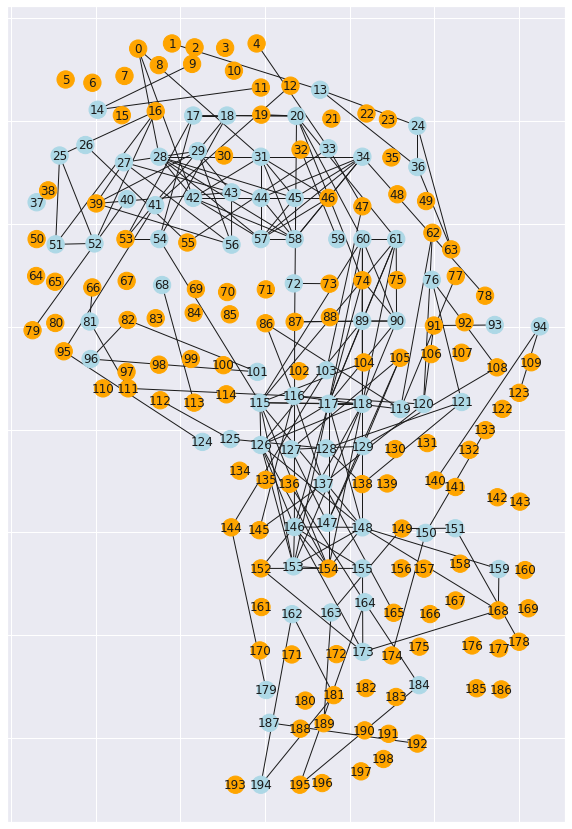

In [414]:
showGraph([x for x in range(L)],edges,vtxs,sol)

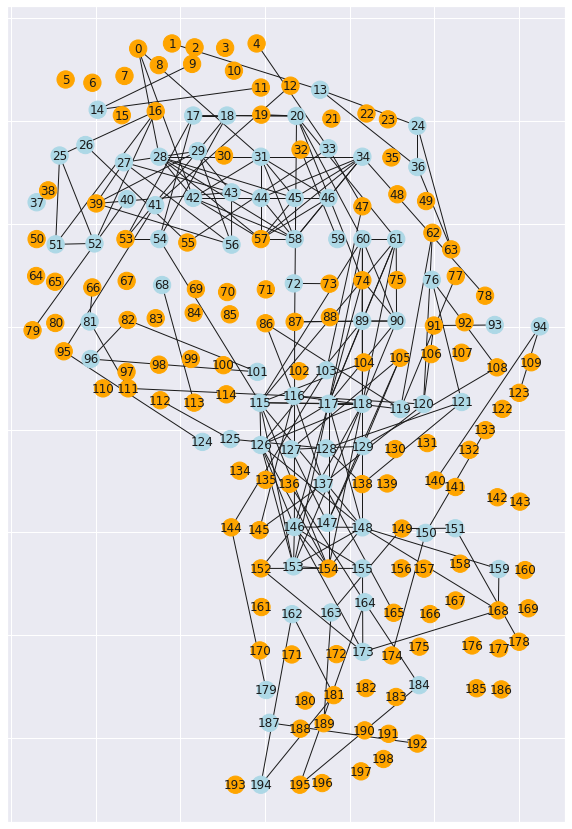

In [415]:
sol = '1111111111111001100101110000001010010011000000011110010101000011111101110111011110111111100110010111101011111111111000000011000000111111101111111100010010101110110001111111101111101111011011111101111'
showGraph([x for x in range(L)],edges,vtxs,sol)

In [5]:
L = 1600
edges, wij, maxl = fnmod.random_flat_graph(L, min(L/2,20), 0.95, 0.5, u)

#sweepd = [1,1,1,2,2,3,3,4]
#sweepi = [5,5,5,5,5,5,5,5]
#sweepn = [1.0e-2,1.0e-3,1.0e-4,1.0e-4,1.0e-4,1.0e-4,1.0e-5,1.0e-5]

sweepd = [1, 2,2,3,3,3,4,4]
sweepi = [10,5,5,5,5,5,5,5]
sweepmin = [5,3,3,3,3,3,2,2]
sweepn = [1.0e-2, 1.0e-3, 1.0e-3] + [1.0e-4, 1.0e-4, 1.0e-4] + [1.0e-5,1.0e-6]


fn = fnmod.FlatNetwork(L,edges,{},maxl)
    
print("\nDMRG for L = ",L)
start_time = time.perf_counter()
e, mps = fn.run(sweepd = sweepd, sweepi = sweepi, sweepn = sweepn, sweepmin = sweepmin)
end_time = time.perf_counter()
    

print("\n----------------------------------------------------")
    


DMRG for L =  1600
Schedule:  0  D =  1
Beginning sweep:  0 of 10
Sweep Energy: -809.00000000
Beginning sweep:  1 of 10
Sweep Energy: -809.00000000
Beginning sweep:  2 of 10
Sweep Energy: -809.00000000
Beginning sweep:  3 of 10
Sweep Energy: -809.00000000
Beginning sweep:  4 of 10
Sweep Energy: -809.00000000
Beginning sweep:  5 of 10
Sweep Energy: -809.00000000
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 5
Sweep Energy: -812.06624052
Beginning sweep:  1 of 5
Sweep Energy: -816.00000000
Beginning sweep:  2 of 5
Sweep Energy: -816.00000000
Beginning sweep:  3 of 5
Sweep Energy: -821.00000000
Beginning sweep:  4 of 5
Sweep Energy: -825.00000000
-----------
Schedule:  2  D =  2
Beginning sweep:  0 of 5
Sweep Energy: -828.00000000
Beginning sweep:  1 of 5
Sweep Energy: -832.00000000
Beginning sweep:  2 of 5
Sweep Energy: -833.00000000
Beginning sweep:  3 of 5
Sweep Energy: -836.00000000
Beginning sweep:  4 of 5
Sweep Energy: -836.99972645
-----------
Schedule:  3  D =  3
Beginn

In [5]:
sweepd = [2, 2,2,3,3,3,4,4]
sweepi = [10,5,5,5,5,5,5,5]
sweepmin = [5,3,3,3,3,3,2,2]
sweepn = [1.0e-2, 1.0e-3, 1.0e-3] + [1.0e-4, 1.0e-4, 1.0e-4] + [1.0e-5,1.0e-6]

for dpt in range(6,len(Ls)):
    fn = fnmod.FlatNetwork(Ls[dpt],edgesColl[dpt],wijColl[dpt],maxlColl[dpt])
    
    print("\nDMRG for L = ",Ls[dpt])
    start_time = time.perf_counter()
    e, mps = fn.run(sweepd = sweepd, sweepi = sweepi, sweepn = sweepn, sweepmin = sweepmin)
    end_time = time.perf_counter()
    
    Energys[1][dpt] = e    
    Times[1][dpt] = end_time - start_time
    print("\n----------------------------------------------------")


DMRG for L =  80
Schedule:  0  D =  2
Beginning sweep:  0 of 10
Sweep Energy:  [-41.]
Beginning sweep:  1 of 10
Sweep Energy:  [-41.]
Beginning sweep:  2 of 10
Sweep Energy:  [-41.]
Beginning sweep:  3 of 10
Sweep Energy:  [-41.]
Beginning sweep:  4 of 10
Sweep Energy:  [-41.]
Beginning sweep:  5 of 10
Sweep Energy:  [-41.]
Beginning sweep:  6 of 10
Sweep Energy:  [-41.]
-----------
Schedule:  1  D =  2
Beginning sweep:  0 of 5
Sweep Energy:  [-41.36106044]
Beginning sweep:  1 of 5
Sweep Energy:  [-42.]
Beginning sweep:  2 of 5
Sweep Energy:  [-42.]
Beginning sweep:  3 of 5
Sweep Energy:  [-42.09888151]
Beginning sweep:  4 of 5
Sweep Energy:  [-43.]
-----------
Schedule:  2  D =  2
Beginning sweep:  0 of 5
Sweep Energy:  [-43.]
Beginning sweep:  1 of 5
Sweep Energy:  [-43.]
Beginning sweep:  2 of 5
Sweep Energy:  [-43.]
Beginning sweep:  3 of 5
Sweep Energy:  [-43.]
Beginning sweep:  4 of 5
Sweep Energy:  [-43.]
-----------
Schedule:  3  D =  3
Beginning sweep:  0 of 5
Sweep Energy:  

Text(0, 0.5, 'Energy')

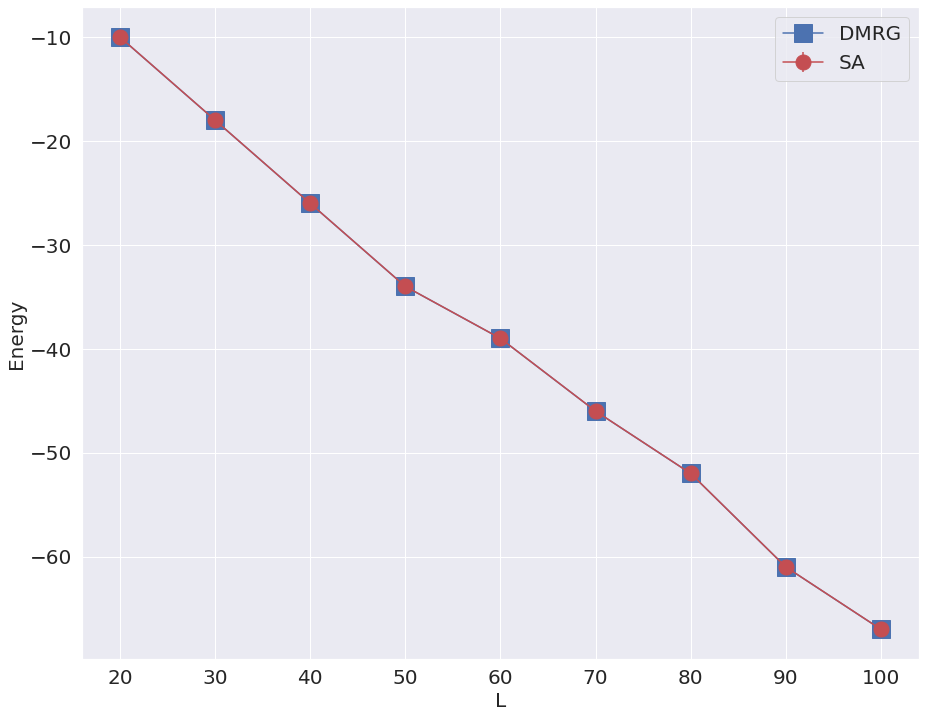

In [53]:
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 32}
matplotlib.rc('font', **font)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)


plt.errorbar(Ls,Energys[0],sEnergys[0],fmt='-or',markersize=15, label='SA')
plt.plot(Ls,Energys[1],'-sb',markersize=18, label='DMRG')
plt.legend()
plt.xlabel('L')
plt.ylabel('Energy')

In [47]:
for dpt in range(len(Ls)):
    fn = fnmod.FlatNetwork(Ls[dpt],edgesColl[dpt],wijColl[dpt],maxlColl[dpt])
    
    print("\nMF for L = ",Ls[dpt])
    start_time = time.perf_counter()
    e, mfstate = fn.runMF()
    end_time = time.perf_counter()
    
    Energys[2][dpt] = e    
    Times[2][dpt] = end_time - start_time


MF for L =  20
** Current Energy:  -5.65 Delta(mf)  4.898979485566356
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219
** Current Energy:  -5.65 Delta(mf)  6.082762530298219
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219
** Current Energy:  -5.65 Delta(mf)  6.082762530298219
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219
** Current Energy:  -5.65 Delta(mf)  6.082762530298219
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219
** Current Energy:  -5.65 Delta(mf)  6.082762530298219
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219
** Current Energy:  -5.65 Delta(mf)  6.082762530298219
** Current Energy:  -3.200000000000001 Delta(mf)  6.082762530298219

MF for L =  30
** Current Energy:  -9.65 Delta(mf)  5.385164807134504
** Current Energy:  -9.500000000000002 Delta(mf)  6.164414002968976
** Current Energy:  -9.65 Delta(mf)  6.164414002968976
** Current Energy:  -9.500000000000002 Delta(mf)  6.

Text(0, 0.5, 'Energy')

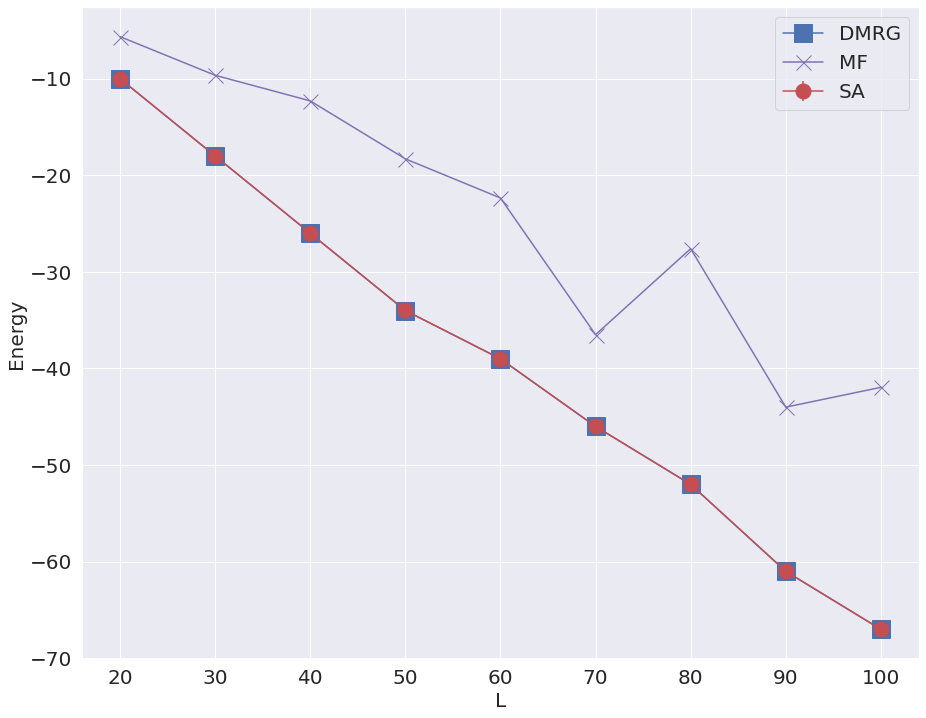

In [54]:
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 32}
matplotlib.rc('font', **font)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)

plt.errorbar(Ls,Energys[0],sEnergys[0],fmt='-or',markersize=15, label='SA')
plt.plot(Ls,Energys[1],'-sb',markersize=18, label='DMRG')
plt.plot(Ls,Energys[2],'-xm',markersize=15, label='MF')
plt.legend()
plt.xlabel('L')
plt.ylabel('Energy')

Text(0, 0.5, 'Time')

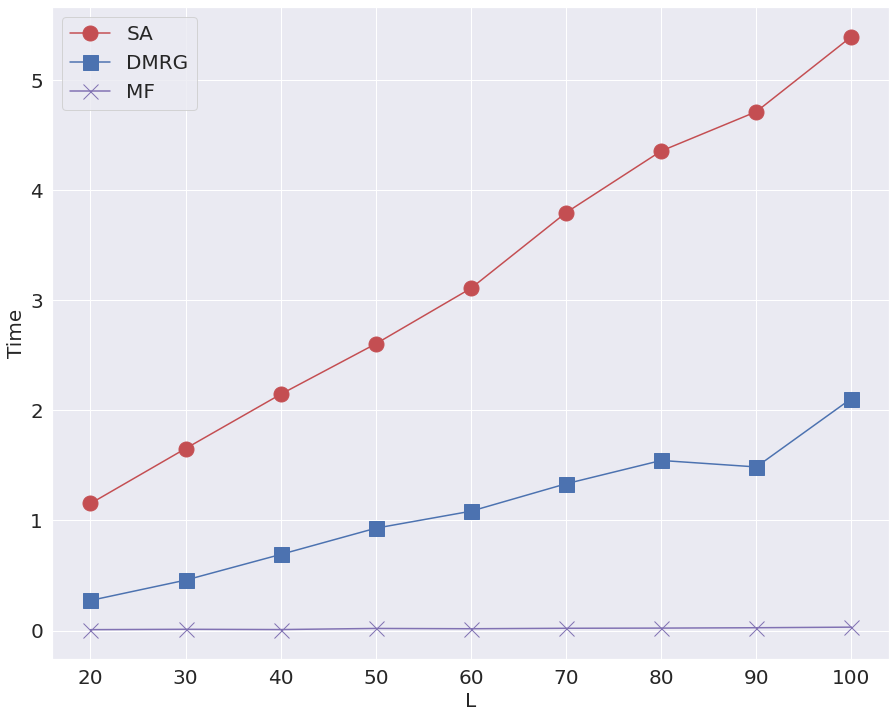

In [55]:
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 32}
matplotlib.rc('font', **font)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)

plt.plot(Ls,Times[0],'-or',markersize=15, label='SA')
plt.plot(Ls,Times[1],'-sb',markersize=15, label='DMRG')
plt.plot(Ls,Times[2],'-xm',markersize=15, label='MF')
plt.legend()
plt.xlabel('L')
plt.ylabel('Time')

# DWave Results

Here we compile results obtained from actual runs on DWAVE Leap Platform.
Please see the file Task3_QA_DWave_bm.ipynb to see the raw output. 

Note: For this first set of graphs the density of the vertices allowed for non-frustrated solutions. As a result
the MIS solutions correspond directly to the energies.

In [63]:
Energys[3][:] = [-10,-18,-26,-34,-39,-46,-52,-61,-67]
Times[3][:] = [0.90570331, 0.85911138, 0.91548854, 0.91432913, 0.94017268, 0.81283322,
 0.82197717, 1.02691823, 1.11084811]


Text(0, 0.5, 'Energy')

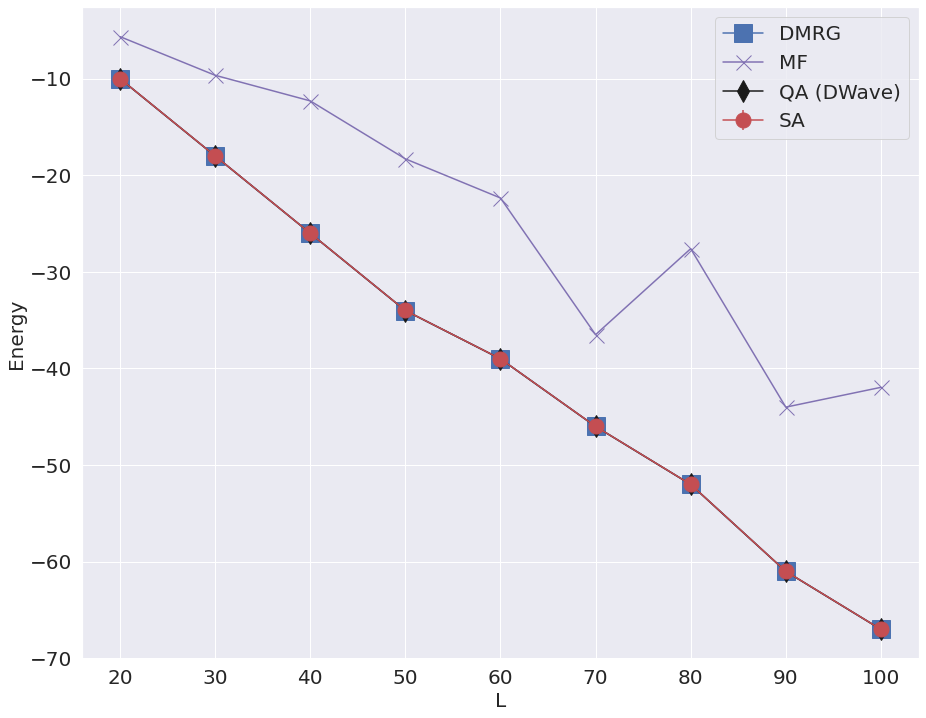

In [66]:
plt.errorbar(Ls,Energys[0],sEnergys[0],fmt='-or',markersize=15, label='SA')
plt.plot(Ls,Energys[1],'-sb',markersize=18, label='DMRG')
plt.plot(Ls,Energys[2],'-xm',markersize=15, label='MF')
plt.plot(Ls,Energys[3],'-dk',markersize=15, label='QA (DWave)')
plt.legend()
plt.xlabel('L')
plt.ylabel('Energy')

Text(0, 0.5, 'Time')

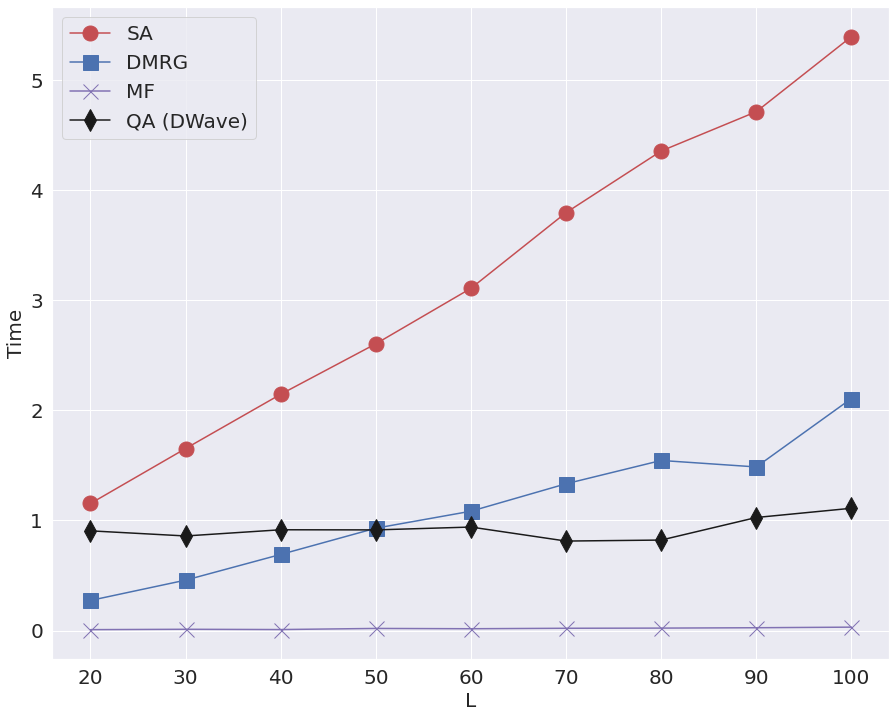

In [67]:
plt.plot(Ls,Times[0],'-or',markersize=15, label='SA')
plt.plot(Ls,Times[1],'-sb',markersize=15, label='DMRG')
plt.plot(Ls,Times[2],'-xm',markersize=15, label='MF')
plt.plot(Ls,Times[3],'-dk',markersize=15, label='QA (DWave)')
plt.legend()
plt.xlabel('L')
plt.ylabel('Time')